На этот раз данные имеют следующую структуру:
- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:

└── data
   ├── 2020-12-30
      │  ├── FirstName_LastName1
         │  │   └── data.csv
            │  ├── FirstName_LastName2
               │  │   └── data.csv
                  │  └── FirstName_LastName3
                     │      └── data.csv
                        └── 2020-12-31
                              ├── FirstName_LastName1
                                    │   └── data.csv
                                          └── FirstName_LastName5
                                                    └── data.csv

Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.
Note: данные в задании покрывают другой временной период, имена тоже другие.

1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [17]:
import pandas as pd
import os

In [18]:
path = 'C:/Users/artyr/Desktop/Karpov_ML/data/'

In [19]:
os.listdir(path)

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [20]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Construct full path to file
        data_path = f'{current_path}/{file}' # os.path.join(..., ...., ....)
        
        # Read data
        temp_df = pd.read_csv(data_path)
        
        # Extract name, date
        current_path = current_path.replace("\\","/")
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data into main df
        df = pd.concat((df, temp_df))
        print(df.shape)
        
#    print(current_path, files)

(6, 5)
(11, 5)
(15, 5)
(18, 5)
(20, 5)
(22, 5)
(27, 5)
(33, 5)
(39, 5)
(42, 5)
(48, 5)
(50, 5)
(53, 5)
(55, 5)
(57, 5)
(59, 5)
(62, 5)
(68, 5)
(73, 5)
(77, 5)
(80, 5)
(84, 5)
(88, 5)
(94, 5)
(96, 5)
(97, 5)
(101, 5)
(103, 5)
(105, 5)
(109, 5)
(112, 5)
(115, 5)
(120, 5)
(126, 5)
(127, 5)
(132, 5)
(138, 5)
(143, 5)
(149, 5)
(150, 5)
(154, 5)
(155, 5)
(158, 5)
(161, 5)


In [21]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [24]:
df.quantity.sum()

480

Вариант 2

In [9]:
from pathlib import Path

In [10]:
Path('C:/Users/artyr/Desktop/Karpov_ML/data/')

WindowsPath('C:/Users/artyr/Desktop/Karpov_ML/data')

In [11]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)
        data_path = part_path / file
              
        # Read data
        temp_df = pd.read_csv(data_path)
        
        # Extract name, date
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data into main df
        df = pd.concat((df, temp_df))
        print(df.shape)
        
#    print(current_path, files)

(6, 5)
(11, 5)
(15, 5)
(18, 5)
(20, 5)
(22, 5)
(27, 5)
(33, 5)
(39, 5)
(42, 5)
(48, 5)
(50, 5)
(53, 5)
(55, 5)
(57, 5)
(59, 5)
(62, 5)
(68, 5)
(73, 5)
(77, 5)
(80, 5)
(84, 5)
(88, 5)
(94, 5)
(96, 5)
(97, 5)
(101, 5)
(103, 5)
(105, 5)
(109, 5)
(112, 5)
(115, 5)
(120, 5)
(126, 5)
(127, 5)
(132, 5)
(138, 5)
(143, 5)
(149, 5)
(150, 5)
(154, 5)
(155, 5)
(158, 5)
(161, 5)


In [12]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
1,1,66,4,2020-12-09,Rostislav_Petrov
2,2,39,2,2020-12-09,Rostislav_Petrov
0,0,82,4,2020-12-09,Vasiliy_Ivanov
1,1,74,2,2020-12-09,Vasiliy_Ivanov


Вариант 3

In [13]:
miniproject_path = Path(path)
miniproject_path

WindowsPath('C:/Users/artyr/Desktop/Karpov_ML/data')

In [14]:
df = pd.DataFrame()

for csv_path in miniproject_path.glob('**/*.csv'):
    temp_df = pd.read_csv(csv_path)
    
    df = pd.concat((df, temp_df))

In [15]:
df

,Unnamed: 0,product_id,quantity
0,0,47,1
1,1,57,1
2,2,14,2
3,3,52,1
4,4,1,4
...,...,...,...
1,1,66,4
2,2,39,2
0,0,82,4
1,1,74,2


2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. 

In [28]:
df.groupby('name') \
  .aggregate({'quantity': 'sum'}) \
  .sort_values('quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [36]:
import seaborn as sns

In [34]:
products_sells = df.groupby('product_id', as_index=False) \
  .aggregate({'quantity': 'sum'}) \
  .sort_values('quantity', ascending=False) \
  .head(10)

In [35]:
products_sells

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

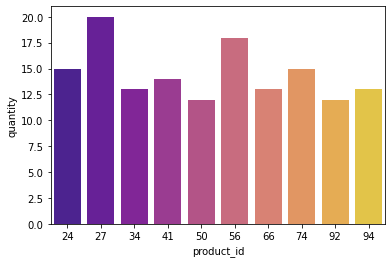

In [53]:
sns.barplot(data=products_sells, x='product_id', 
            y='quantity', 
            palette="plasma",
            alpha=0.95)

In [55]:
products_sells.query('product_id == 56')

,product_id,quantity
42,56,18


4. Визуализируйте продажи по дням.

<AxesSubplot:xlabel='date'>

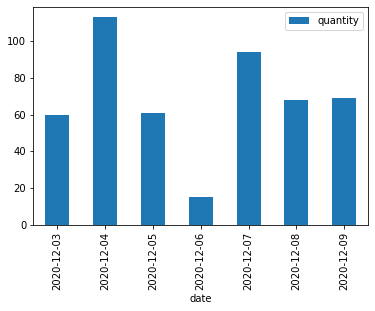

In [57]:
df.groupby('date') \
  .aggregate({'quantity': 'sum'}) \
  .plot(kind='bar')

5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [58]:
df.groupby(['name', 'product_id']) \
  .aggregate({'date': pd.Series.nunique}) \
  .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
